# Step 1: Reading and understanding the data


In [1]:
# importing library

In [2]:
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings 
    warnings.filterwarnings('ignore')
    import statsmodels
    import statsmodels.api as sm
    import sklearn
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import RFE
    from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
##read the csv file using pandas
df = pd.read_csv("day.csv")

In [4]:
## check the data head 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
##check the details of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Step 2 : Cleaning data


In [8]:
# check null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Inference- There are no null values

In [9]:
## copying the data frame to check for duplicates
df_duplicate = df.copy()
df_duplicate.shape

(730, 16)

In [10]:
df_duplicate.drop_duplicates(inplace=True)
df_duplicate.shape

(730, 16)

Inference- no duplicate in data frame as the shape of duplicate data frame is same after dropping duplicates.

In [11]:
## Droping unwanted columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

- 'instant' - has only index for rows
- 'dteday' - has data which gets compensated with 'year' and 'month'column
- 'casual' and 'registered'- decribed by the target variable 'cnt'

In [12]:
df.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
df.shape

(730, 12)

In [15]:
## checking for outliers

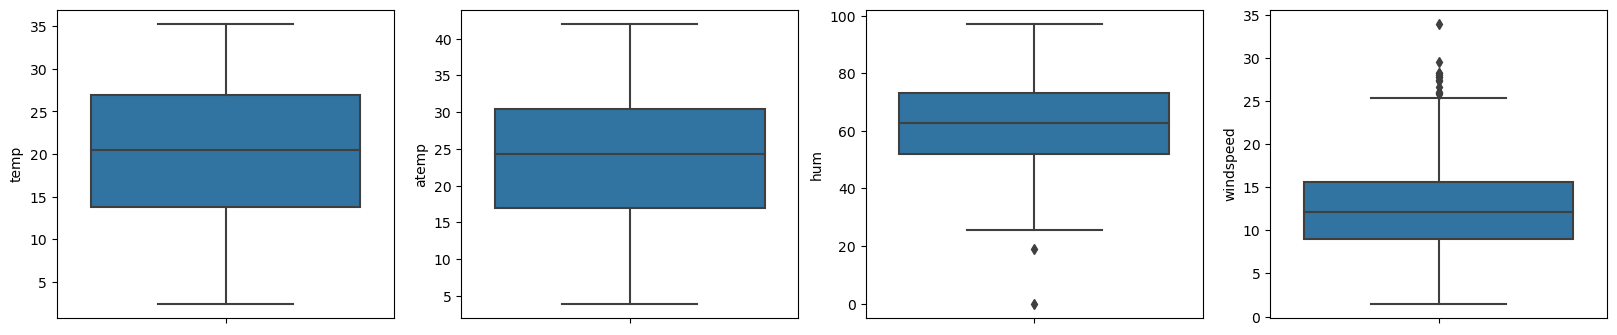

In [16]:
cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(20,4))
i=1
for cols in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=cols, data=df)
    i+=1

Inference- From above plots we can say that there are no outliers to taken care off. 

# Step 3 : EDA

In [17]:
## encoding the Season column, month column, weekday column, weatherlist column
## converting into categorical column

In [18]:
df.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [19]:
df.mnth.replace({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"},inplace=True)

In [20]:
df.weathersit.replace({1:"clear",2:"Mist",3:"Light snow+rain",4:"Heavy snow+rain"},inplace=True)

In [21]:
df.weekday.replace({0:"sun",1:"mon",2:"tue",3:"wed",4:"thu",5:"fri",6:"sat"},inplace=True)

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 2000x4000 with 0 Axes>

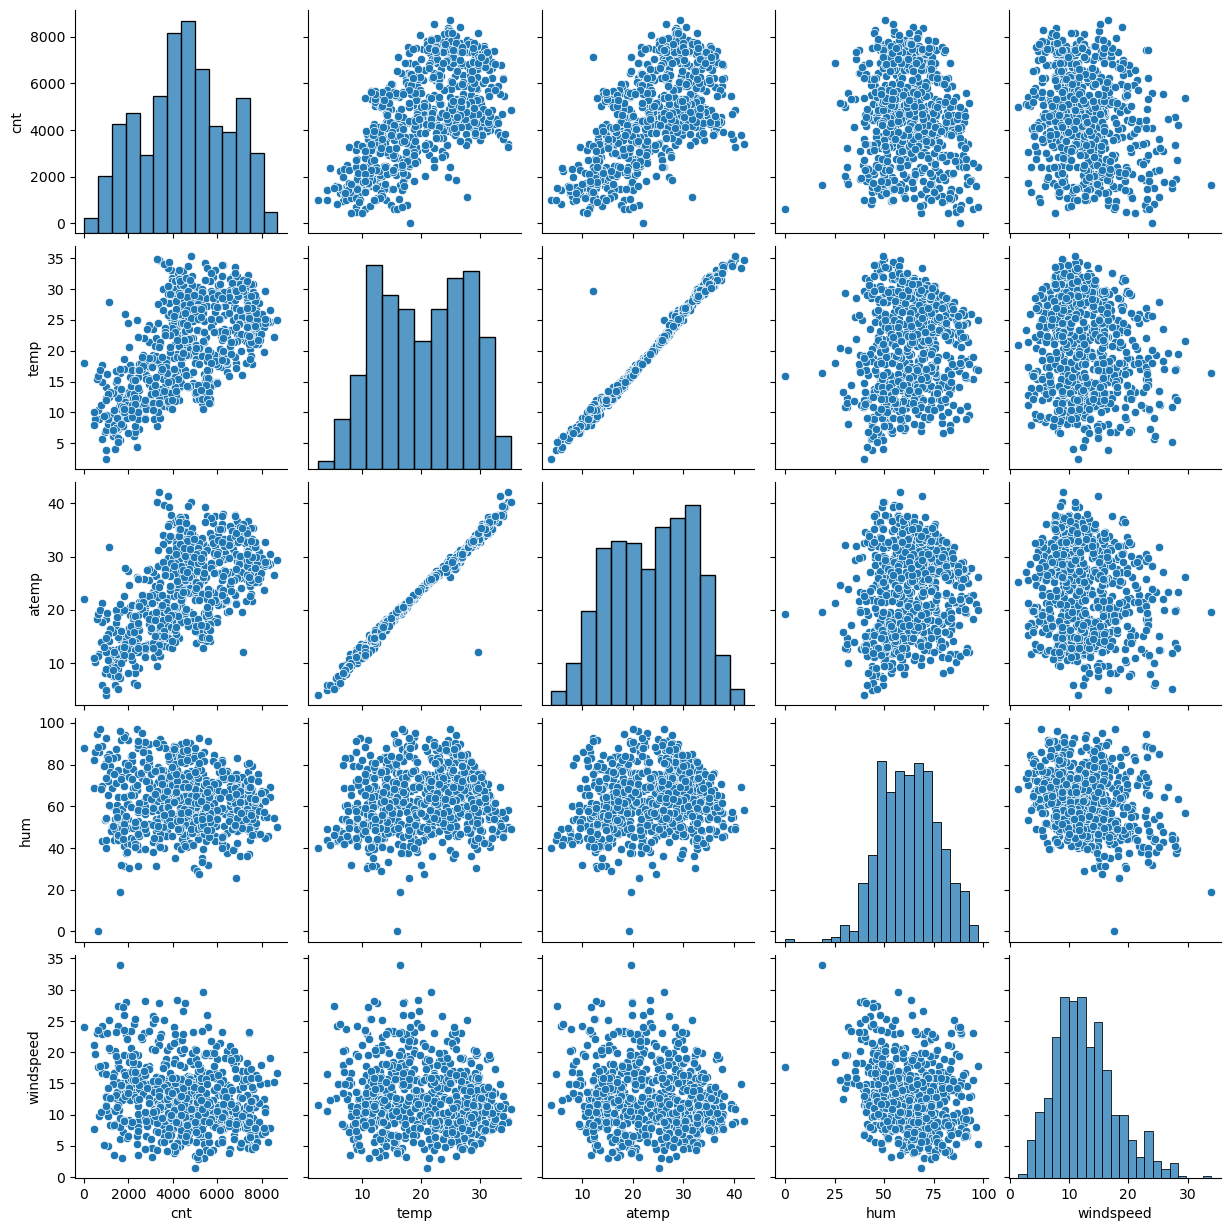

In [23]:
plt.figure(figsize=(20,40))
sns.pairplot(data=df, vars=('cnt','temp','atemp','hum','windspeed'))

Inference-
- 'temp' and 'atemp' shows highest correlation with target variable 'cnt'.
- 'temp' and 'atemp' are highly correlated with each other

This inference should be consider while model building.

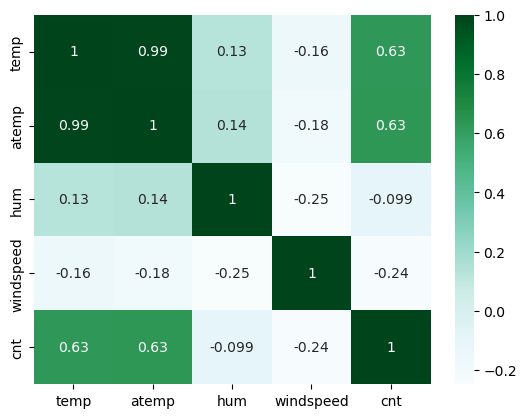

In [24]:
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Inference- 
'temp' and 'atemp' are highly correlated with each other almost 0.99 correlation and it's been seen that 'atemp' is derived from 'temp' hence 'atemp' can be droped, as it shows multicolinearity which can interfer in regression analysis. 
currently we are not dropping we will drop on basis of 'VIF" and "p-values'.

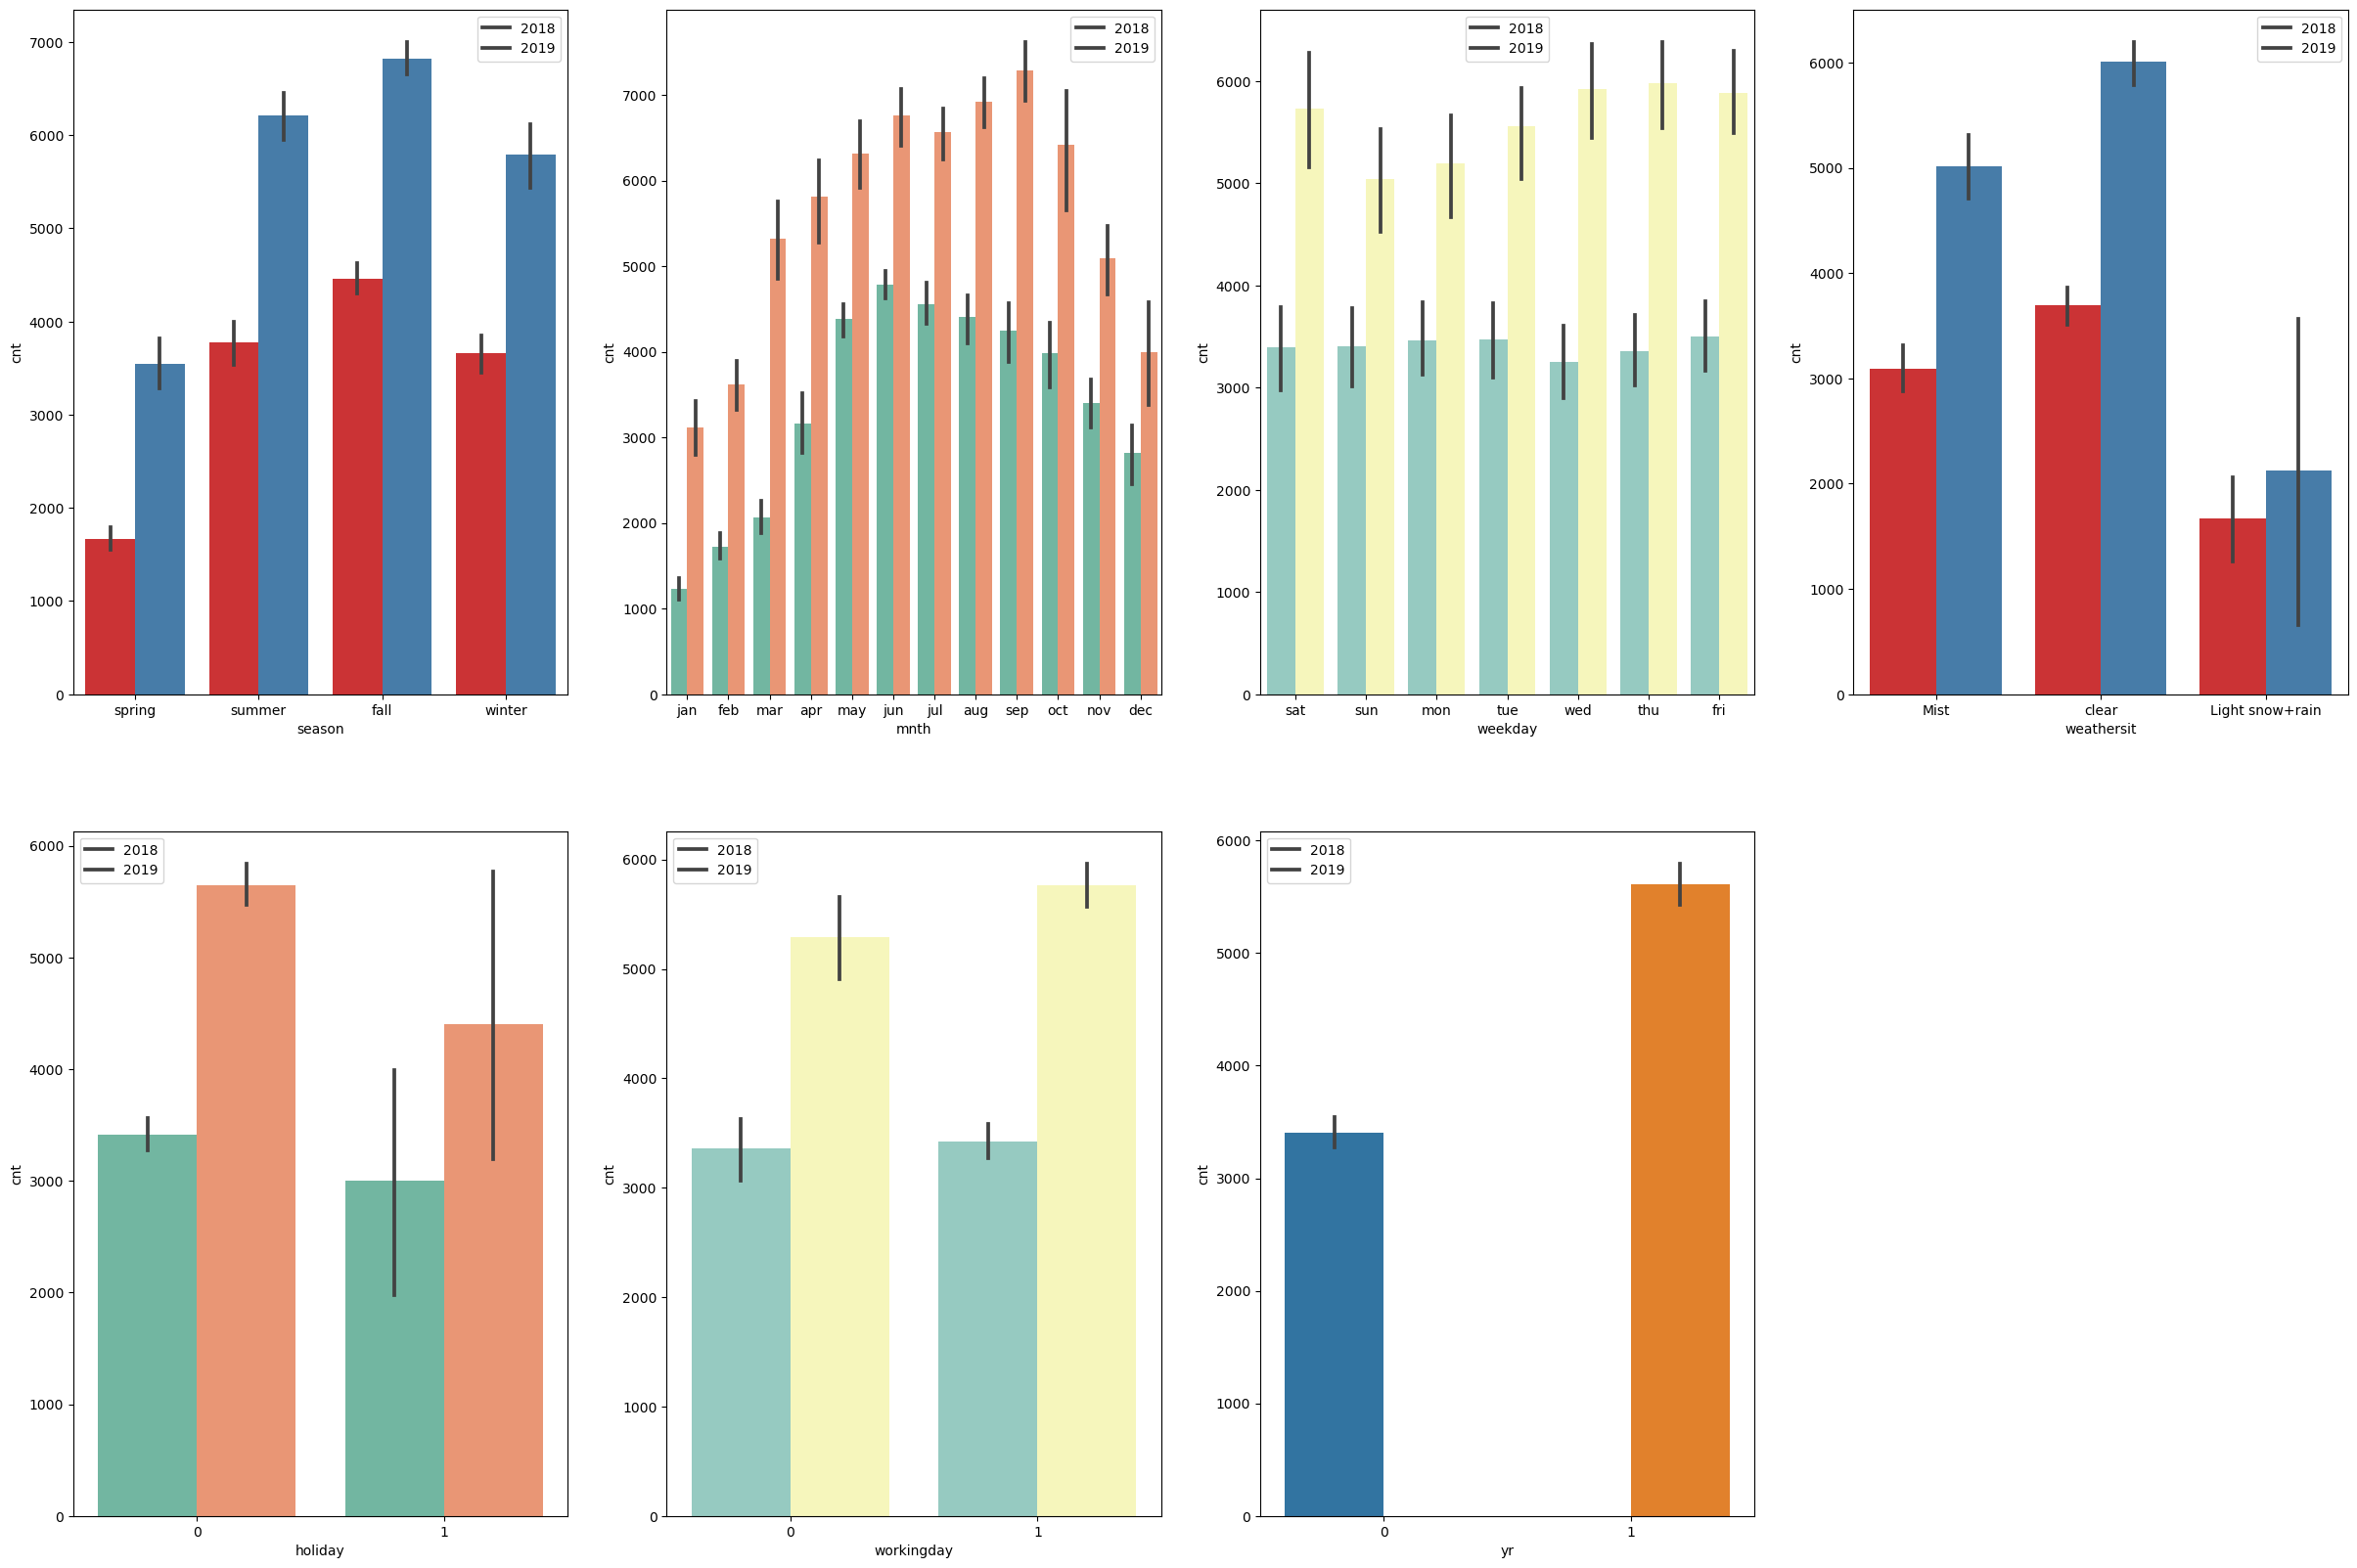

In [25]:
plt.figure(figsize=(30, 20))
plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'cnt', hue='yr', data = df,palette='Set1' )
plt.legend(labels=['2018', '2019'])
plt.subplot(2,4,2)
sns.barplot(x = 'mnth', y = 'cnt',hue='yr', data = df, palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.subplot(2,4,3)
sns.barplot(x = 'weekday', y = 'cnt',hue='yr', data = df,palette='Set3')
plt.legend(labels=['2018', '2019'])
plt.subplot(2,4,4)
sns.barplot(x = 'weathersit', y = 'cnt',hue='yr', data = df,palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.subplot(2,4,5)
sns.barplot(x = 'holiday', y = 'cnt', hue='yr',data = df, palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.subplot(2,4,6)
sns.barplot(x = 'workingday', y = 'cnt', hue='yr',data = df,palette='Set3')
plt.legend(labels=['2018', '2019'])
plt.subplot(2,4,7)
sns.barplot(x = 'yr', y = 'cnt', hue='yr',data = df)
plt.legend(labels=['2018', '2019'])
plt.show()

Inference- 
1) season- It can be seen that fall season has more followed by summer, winter and least with spring. It can also be seen that booking has drastically increased from 2018 to 2019
2) Mnth - It can be seen more booking are done in month of may, june,july,august, september and october. It's been seen that booking trend shows increase in booking at thar start of the year but by the end of the year it shows decrease, this trend is same in 2018 and 2019 though there is increse in booking from 2018 to 2019 in each month. 
3) weekday- Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.
4) weather situation - Clear weather has more booking followed by Mist, light snow + rain, as other variable it also shows increase in booking from 2018 to 2019.
5) holiday - on holiday there is decrese in booking.
6) working day - there is no much difference in working day or non working day.
7) year - From 2018 to 2019 there is drastic increase in booking for bikes, which is good indication in terms of buisness perspective.

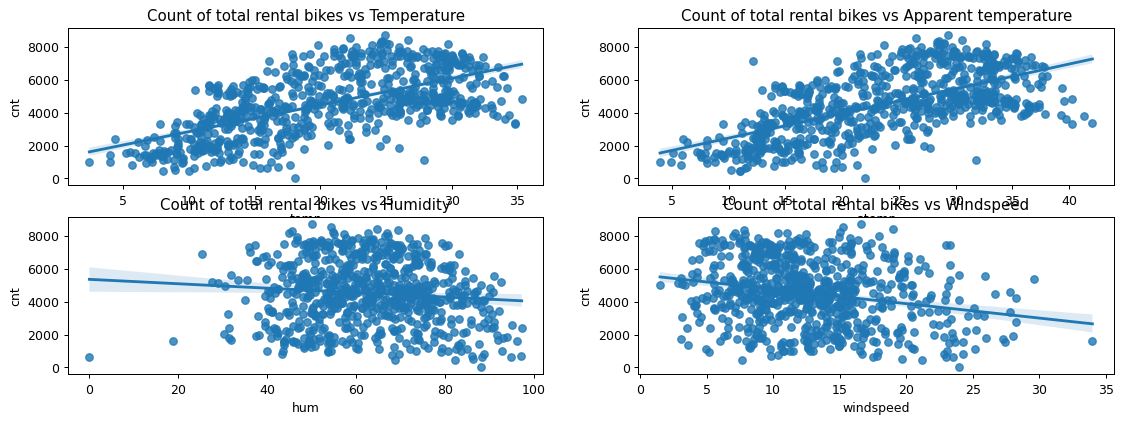

In [26]:
plt.figure(figsize=(15,5), dpi=90)

plt.subplot(2,2,1)
sns.regplot(data=df, y='cnt', x='temp')
plt.title("Count of total rental bikes vs Temperature")
plt.subplot(2,2,2)
sns.regplot(data=df, y='cnt', x='atemp')
plt.title("Count of total rental bikes vs Apparent temperature")
plt.subplot(2,2,3)
sns.regplot(data=df, y='cnt', x='hum')
plt.title("Count of total rental bikes vs Humidity")
plt.subplot(2,2,4)
sns.regplot(data=df, y='cnt', x='windspeed')
plt.title("Count of total rental bikes vs Windspeed")

plt.show()

Inference- 
 - we can see that 'cnt' is positively corelated with 'temp' and 'atemp'
 - humidity values are more scattered around and 'cnt'decreases as humidity increases.
 - Increase in windspeed causes decrease in 'cnt'

# Step 4 : Pre processing

# Dummy variable creation (One Hot Coding)

In [27]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [28]:
cat_cols=["season","mnth","weekday","weathersit"]

In [29]:
df[cat_cols].nunique()

season         4
mnth          12
weekday        7
weathersit     3
dtype: int64

In [30]:
dum=pd.get_dummies(df[cat_cols],drop_first=True,dtype=int)
dum.head(10)

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_clear
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [31]:
df1=pd.concat([df,dum],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_clear
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,1
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,1
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,1


In [32]:
df1.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   season_spring     730 non-null    int32  
 9   season_summer     730 non-null    int32  
 10  season_winter     730 non-null    int32  
 11  mnth_aug          730 non-null    int32  
 12  mnth_dec          730 non-null    int32  
 13  mnth_feb          730 non-null    int32  
 14  mnth_jan          730 non-null    int32  
 15  mnth_jul          730 non-null    int32  
 16  mnth_jun          730 non-null    int32  
 1

In [34]:
df1.shape

(730, 30)

# Step 5: Data splitting

# Train-Test split

In [35]:
df1.shape

(730, 30)

In [36]:
#y to contain only target variable
y=df1.pop('cnt')

#X is all remainign variable also our independent variables
X=df1

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [37]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_clear
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [38]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


# Step 6 :Feature Scaling continuous variables 

To make all features on same scale for ease in interpretation

'temp', 'atemp', 'hum','windspeed' to be scaled 


In [39]:
# scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [40]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_clear
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.344423,0.626223
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.475645,0.484280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_clear
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0


# Step 7: Model building using RFE

In [42]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:

#Cut down number of features to 10 using automated approach
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10)

selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = selector.support_

# Print or use the selected features
print("Selected Features:", selected_features)


Selected Features: [ True  True  True  True False False  True  True False False False False
 False False False False False False False False False False  True  True
 False False False  True  True]


In [44]:
selected_feature_indices = [i for i, selected in enumerate(selected_features) if selected]
print("Selected Feature Indices:", selected_feature_indices)


Selected Feature Indices: [0, 1, 2, 3, 6, 7, 22, 23, 27, 28]


In [45]:
###Columns selected by RFE and their weights
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', False, 3),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 19),
 ('season_winter', False, 8),
 ('mnth_aug', False, 14),
 ('mnth_dec', False, 18),
 ('mnth_feb', False, 16),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 4),
 ('mnth_jun', False, 20),
 ('mnth_mar', False, 10),
 ('mnth_may', False, 9),
 ('mnth_nov', False, 13),
 ('mnth_oct', False, 6),
 ('mnth_sep', False, 5),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 17),
 ('weathersit_Mist', True, 1),
 ('weathersit_clear', True, 1)]

model building using statsmodel api -------

In [46]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

function to calculate VIF

In [47]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

Printing column selected by RFE

In [48]:
X_train.columns[selector.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'weekday_sat', 'weekday_sun', 'weathersit_Mist', 'weathersit_clear'],
      dtype='object')

In [49]:
## taking 10 columns selected by RFE
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'weekday_sat', 'weekday_sun', 'weathersit_Mist', 'weathersit_clear']]

In [50]:
X_train_rfe.shape

(511, 10)

# Step 8 : Building Model

# Model 1

In [51]:
model_1=sm.OLS(y_train,X_train_rfe)
lr_1=model_1.fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.21e-181
Time:                        23:33:03   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
yr                2058.7077     74.381     27.678      0.000    1912.570    2204.845
holiday           -292.1743    348.902     -0.837      0.403    -977.665     393.316
workingday         481.3042    263.156      1.829      0.068     -35.722     998.330
temp              3101.8443    210.111     14.763      0.000    2689.037    3514.652
windspeed        -1366.6339    223.484     -6.115      0.000   -1805.716    -927.552
season_spring    -1343.0519    109.210    -12.298      0.000   -1557.618   -1128.486
weekday_sat        577.4883    274.503      2.104      0.036      38.170    1116.806
weekday_sun         72.2221    278.700      0.259      0.796    -475.342     619.787
weathersit_Mist   1749.7003    226.094      7.739      0.000    1305.491    2193.909
weathersit_clear  2428.2459    222.864     10.896      0.000    1990.382    2866.109
==============================================================================
Omnibus:                       56.218   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.446
Skew:                          -0.596   Prob(JB):                     1.28e-28
Kurtosis:                       5.148   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
## dropiing "holiday" due to high p-Value
X_train_rfe = X_train_rfe.drop(["holiday"],axis=1)

In [53]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_rfe.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) \
                 for i in range(len(X_train_rfe.columns))]
vif_data

,Feature,VIF
0,yr,2.070543
1,workingday,15.846704
2,temp,10.010484
3,windspeed,4.445477
4,season_spring,2.045963
5,weekday_sat,4.345236
6,weekday_sun,4.159625
7,weathersit_Mist,8.189680
8,weathersit_clear,14.342301


# Model 2

In [54]:
model_2=sm.OLS(y_train,X_train_rfe)
lr_2=model_2.fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1907.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:33:03   Log-Likelihood:                         -4157.0
No. Observations:                 511   AIC:                                      8332.
Df Residuals:                     502   BIC:                                      8370.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
yr                2057.0314     74.332     27.674      0.000    1910.991    2203.072
workingday         643.3730    178.259      3.609      0.000     293.147     993.599
temp              3048.2264    200.058     15.237      0.000    2655.172    3441.281
windspeed        -1420.0858    214.111     -6.632      0.000   -1840.751    -999.421
season_spring    -1361.2511    106.994    -12.723      0.000   -1571.462   -1151.040
weekday_sat        738.9311    195.350      3.783      0.000     355.126    1122.736
weekday_sun        235.7124    198.832      1.185      0.236    -154.933     626.358
weathersit_Mist   1634.8357    179.679      9.099      0.000    1281.819    1987.852
weathersit_clear  2314.1813    176.342     13.123      0.000    1967.722    2660.640
==============================================================================
Omnibus:                       58.049   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.481
Skew:                          -0.605   Prob(JB):                     2.31e-30
Kurtosis:                       5.224   Cond. No.                         13.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
## dropiing "weekday_sun" due to high p-Value
X_train_rfe = X_train_rfe.drop(["weekday_sun"],axis=1)

# Model 3

In [56]:
model_3=sm.OLS(y_train,X_train_rfe)
lr_3=model_3.fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              2143.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:33:03   Log-Likelihood:                         -4157.7
No. Observations:                 511   AIC:                                      8331.
Df Residuals:                     503   BIC:                                      8365.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
yr                2059.9056     74.323     27.716      0.000    1913.885    2205.926
workingday         465.3073     96.033      4.845      0.000     276.633     653.982
temp              3117.5239    191.405     16.288      0.000    2741.473    3493.575
windspeed        -1363.5098    208.809     -6.530      0.000   -1773.755    -953.265
season_spring    -1343.8481    106.025    -12.675      0.000   -1552.154   -1135.542
weekday_sat        562.0651    126.159      4.455      0.000     314.202     809.928
weathersit_Mist   1757.6903    146.841     11.970      0.000    1469.193    2046.188
weathersit_clear  2433.3546    144.940     16.789      0.000    2148.592    2718.117
==============================================================================
Omnibus:                       59.263   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.167
Skew:                          -0.617   Prob(JB):                     6.03e-31
Kurtosis:                       5.239   Cond. No.                         9.60
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_rfe.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) \
                 for i in range(len(X_train_rfe.columns))]
vif_data

,Feature,VIF
0,yr,2.068340
1,workingday,4.595389
2,temp,9.155840
3,windspeed,4.224619
4,season_spring,2.007447
5,weekday_sat,1.810794
6,weathersit_Mist,5.465335
7,weathersit_clear,9.681345


In [58]:
## dropiing "weathersit_clear" due to high p-Value
X_train_rfe = X_train_rfe.drop(["weathersit_clear"],axis=1)

# Model 4

In [59]:


model_4=sm.OLS(y_train,X_train_rfe)
lr_4=model_4.fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1547.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:33:03   Log-Likelihood:                         -4271.4
No. Observations:                 511   AIC:                                      8557.
Df Residuals:                     504   BIC:                                      8586.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
yr               2229.9643     91.882     24.270      0.000    2049.446    2410.483
workingday        926.7129    114.827      8.071      0.000     701.114    1152.312
temp             5248.8647    178.756     29.363      0.000    4897.666    5600.064
windspeed        -291.1136    248.082     -1.173      0.241    -778.516     196.288
season_spring    -558.0757    118.719     -4.701      0.000    -791.321    -324.830
weekday_sat      1035.4336    153.451      6.748      0.000     733.950    1336.917
weathersit_Mist  -347.0005     95.416     -3.637      0.000    -534.463    -159.538
==============================================================================
Omnibus:                       73.472   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.272
Skew:                          -0.812   Prob(JB):                     1.05e-32
Kurtosis:                       5.069   Cond. No.                         7.08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_rfe.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) \
                 for i in range(len(X_train_rfe.columns))]
vif_data

,Feature,VIF
0,yr,2.029921
1,workingday,4.219018
2,temp,5.128064
3,windspeed,3.829283
4,season_spring,1.616255
5,weekday_sat,1.720345
6,weathersit_Mist,1.481840


In [61]:
## dropiing "windspeed" due to high p-Value
X_train_rfe = X_train_rfe.drop(["windspeed"],axis=1)

# Model 5

In [62]:
model_5=sm.OLS(y_train,X_train_rfe)
lr_5=model_5.fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1803.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:33:03   Log-Likelihood:                         -4272.1
No. Observations:                 511   AIC:                                      8556.
Df Residuals:                     505   BIC:                                      8582.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
yr               2220.5698     91.567     24.251      0.000    2040.672    2400.468
workingday        896.9116    112.025      8.006      0.000     676.819    1117.005
temp             5171.4339    166.194     31.117      0.000    4844.918    5497.950
season_spring    -611.7319    109.601     -5.581      0.000    -827.063    -396.401
weekday_sat       997.2891    150.025      6.647      0.000     702.539    1292.039
weathersit_Mist  -353.7429     95.278     -3.713      0.000    -540.934    -166.552
==============================================================================
Omnibus:                       78.113   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.851
Skew:                          -0.836   Prob(JB):                     9.68e-37
Kurtosis:                       5.235   Cond. No.                         5.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_rfe.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) \
                 for i in range(len(X_train_rfe.columns))]
vif_data

,Feature,VIF
0,yr,2.014510
1,workingday,4.012643
2,temp,4.429311
3,season_spring,1.376497
4,weekday_sat,1.643148
5,weathersit_Mist,1.476467


Inference- 
In model 5 VIF values seems to be fine, p-value for all variables are 0.0 and R2 is also 0.955
Hence, Model 5 is been selected asour final model.
Difference in R-squared and Adj. R-squared is minimal.

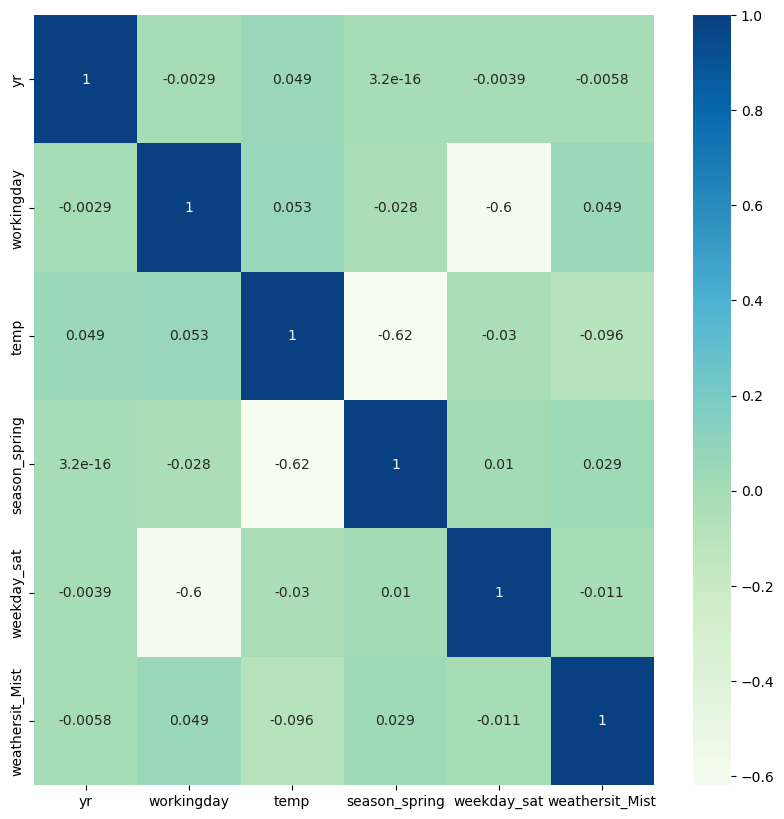

In [64]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (10,10))
sns.heatmap(df1[['yr','workingday','temp','season_spring','weekday_sat',"weathersit_Mist"]].corr(), cmap='GnBu', annot=True)
plt.show()

Inference - 
From above heatmap it has been seen that there no multicolinearity between variable, which eco model 5.

In [65]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [66]:
cols = ['workingday','temp','season_spring','weekday_sat','weathersit_Mist','yr']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1725.0507488768817 [  403.48001355  3448.75029531 -1294.47890728   463.46606024
  -535.50400503  2096.3863864 ]


# Step 9 : Model evaluation


# Residual Analysis

In [67]:
y_train_pred = lr.predict(X_train[cols])

In [68]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')

    plt.xlabel('Errors')

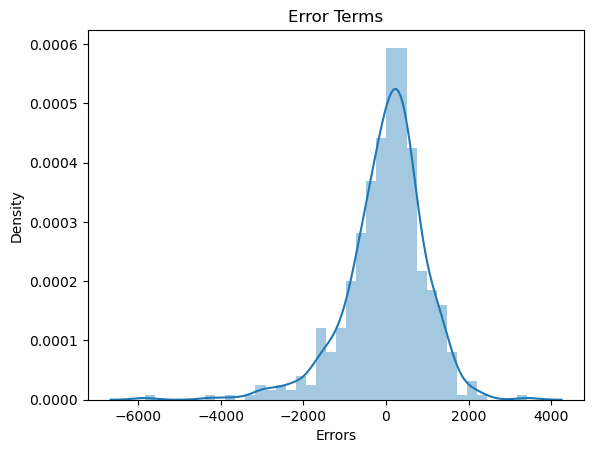

In [69]:
plot_res_dist(y_train, y_train_pred)

Inference- 

Errors are normally distribured here with mean 0. So model is working fine

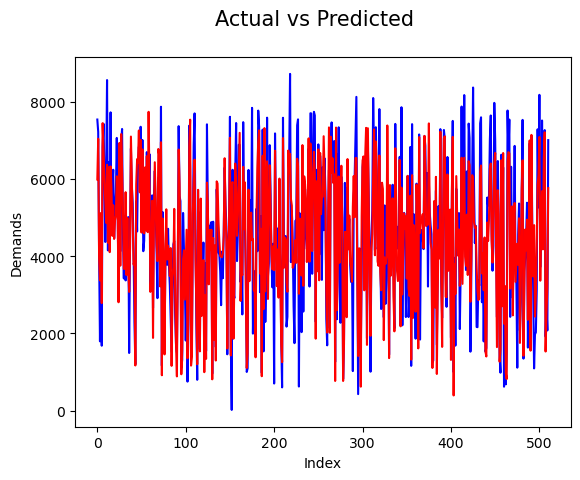

In [70]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Inference-
Actual vs Predicted follows same pattern hence model seems to be ok.

In [71]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7605055301100917

Inference - 
nearly same as obtained from model 5

# Linearity Check

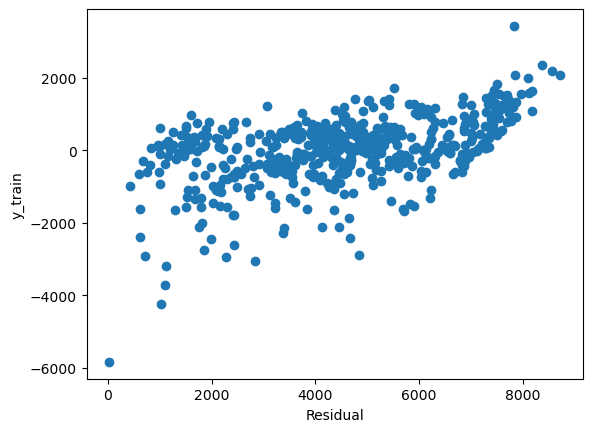

In [72]:
# scatter plot for linearity check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# Predicting values for Test data set

In [73]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [74]:
#Columns from our final model
cols = ['workingday','temp','season_spring','weekday_sat','weathersit_Mist','yr']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [75]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7659213628237994

Inference - 

R2 value for predictions on test data (0.765) is almost same as R2 value of train data(0.760). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

# Homoscedacity


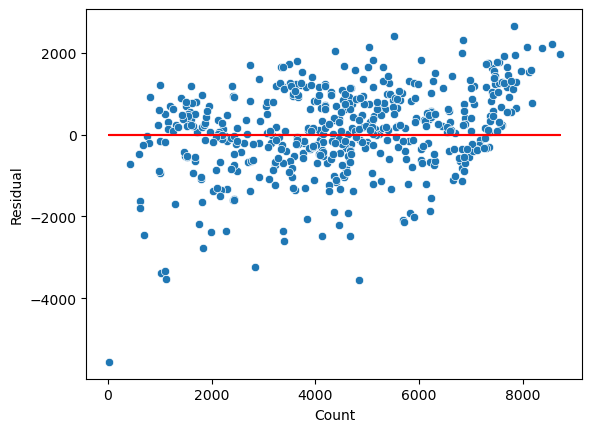

In [76]:
y_train_pred = lr_5.predict(X_train_rfe)
sns.scatterplot(x=y_train,y=y_train - y_train_pred)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Inference- 
No visible pattern observed from above plot for residuals.



Text(0, 0.5, 'y_test_pred')

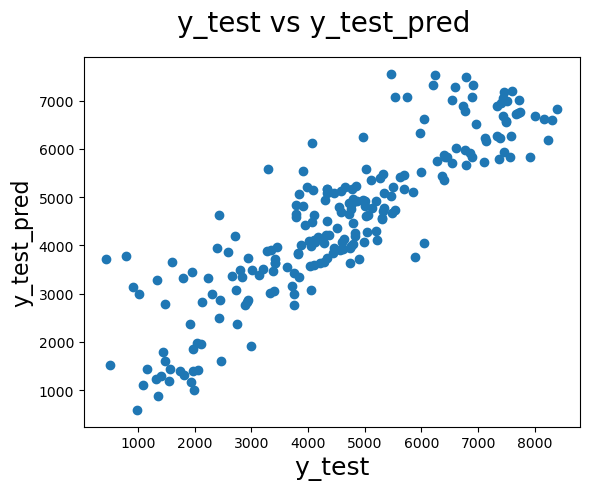

In [77]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

Inference-
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

# Plot of Actual vs Predicted data

In [78]:
#Function to plot Actual vs Predicted
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               

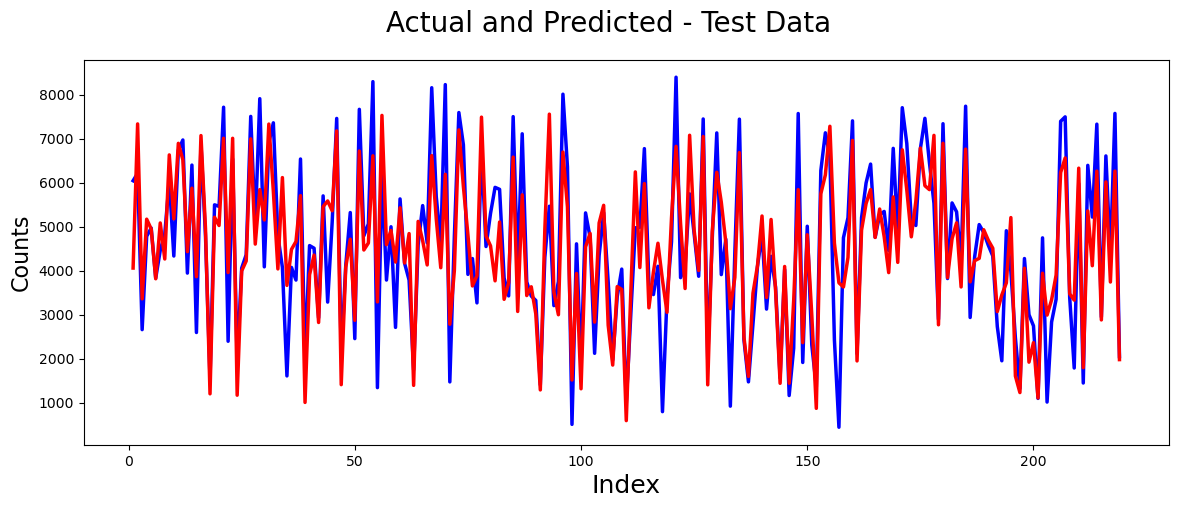

In [79]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

Inference-
Actual vs Predicted for Test data follows same pattern hence model seems to be ok.

# Step 10 : Model Interpretation

In [80]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr','workingday','temp','season_spring','weekday_sat',"weathersit_Mist"]

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     266.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.12e-153
Time:                        23:33:05   Log-Likelihood:                -4231.4
No. Observations:                 511   AIC:                             8477.
Df Residuals:                     504   BIC:                             8507.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1725.0507    185.006     

Inference- 

-Spring is good season for fetching business.

-company should concentrate building buisness on workingday and on Saturday.

-Also Misty day can be used for buisness building.

-Demand has been incresaed drastically from 2018 to 2019, so its expected it might also boom as situation becomes normal.



Equation for best fitted line - 

cnt = 1725.0507 + 2096.3864 x yr + 403.4800 x workingday + 3448.7503 x temp - 1294.4789 x season_spring + 463.4661 x weekday_sat - 535.5040  x weathersit_Mist

Year, Workingday, Temperature, Spring season, Saturday, Misty weather are significant variables which can be used to predict demand fo bike
